In [4]:
#copied from starter code
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

import sys
import os

path = os.path.abspath("../Starter_Code/starter_code")
sys.path.append(path)
#Import the OpenWeatherMap API key
from api_keys import weather_api_key

#Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [6]:
#copied from starter code
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


In [16]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | dolores
Processing Record 4 of Set 1 | prince rupert
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | pangai
Processing Record 7 of Set 1 | port saint john's
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | gallup
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | isafjordur
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | ar ruways
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | udachny
Processing Record 16 of Set 1 | fortuna
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | tuy hoa
Processing Record 19 of Set 1 | santona
Processing Record 20 of Set 1 | queenstown
Processing Record 21 of Set 1 | hawaiian paradise par

Processing Record 40 of Set 4 | iskateley
Processing Record 41 of Set 4 | karapinar
Processing Record 42 of Set 4 | westport
Processing Record 43 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 44 of Set 4 | idri
Processing Record 45 of Set 4 | wailua homesteads
Processing Record 46 of Set 4 | zhezqazghan
Processing Record 47 of Set 4 | olonkinbyen
Processing Record 48 of Set 4 | markovo
Processing Record 49 of Set 4 | hamilton
Processing Record 0 of Set 5 | sogndal
Processing Record 1 of Set 5 | tsiombe
Processing Record 2 of Set 5 | oliver
Processing Record 3 of Set 5 | natal
Processing Record 4 of Set 5 | tofol
Processing Record 5 of Set 5 | zakynthos
Processing Record 6 of Set 5 | djibouti
Processing Record 7 of Set 5 | punta arenas
Processing Record 8 of Set 5 | uturoa
Processing Record 9 of Set 5 | mana
Processing Record 10 of Set 5 | atherton
Processing Record 11 of Set 5 | portland
Processing Record 12 of Set 5 | suntar
Processing Record 13 of Set 5 | talara


City not found. Skipping...
Processing Record 35 of Set 8 | awjilah
Processing Record 36 of Set 8 | puerto san jose
Processing Record 37 of Set 8 | usinsk
Processing Record 38 of Set 8 | kirensk
Processing Record 39 of Set 8 | praia da vitoria
Processing Record 40 of Set 8 | piti village
Processing Record 41 of Set 8 | napili-honokowai
Processing Record 42 of Set 8 | fort st. john
Processing Record 43 of Set 8 | nadi
Processing Record 44 of Set 8 | mili
Processing Record 45 of Set 8 | kolwezi
Processing Record 46 of Set 8 | safaga
Processing Record 47 of Set 8 | las tablas
Processing Record 48 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 49 of Set 8 | greenville
Processing Record 0 of Set 9 | kosonsoy
Processing Record 1 of Set 9 | zaragoza
Processing Record 2 of Set 9 | leava
Processing Record 3 of Set 9 | wilson
Processing Record 4 of Set 9 | khalkhal
Processing Record 5 of Set 9 | quanzhou
Processing Record 6 of Set 9 | taitung city
Processing Record 7 of Set 

Processing Record 25 of Set 12 | taro
Processing Record 26 of Set 12 | baoqing
Processing Record 27 of Set 12 | guajara mirim
Processing Record 28 of Set 12 | ahau
City not found. Skipping...
Processing Record 29 of Set 12 | axim
Processing Record 30 of Set 12 | aver-o-mar
Processing Record 31 of Set 12 | hanzhong
Processing Record 32 of Set 12 | klyuchi
Processing Record 33 of Set 12 | aur
Processing Record 34 of Set 12 | benguela
Processing Record 35 of Set 12 | tadine
Processing Record 36 of Set 12 | acambaro
Processing Record 37 of Set 12 | marshall
Processing Record 38 of Set 12 | oppdal
Processing Record 39 of Set 12 | kone
Processing Record 40 of Set 12 | mukah
City not found. Skipping...
Processing Record 41 of Set 12 | north bend
Processing Record 42 of Set 12 | egilsstadir
Processing Record 43 of Set 12 | cova figueira
Processing Record 44 of Set 12 | golden grove
Processing Record 45 of Set 12 | adrar
Processing Record 46 of Set 12 | fresno
Processing Record 47 of Set 12 | l

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,14.08,81,92,10.73,SH,1688821752
1,grytviken,-54.2811,-36.5092,-6.97,81,18,4.71,GS,1688821753
2,dolores,-36.3132,-57.6792,8.41,71,100,2.76,AR,1688821691
3,prince rupert,54.3161,-130.3201,15.07,91,82,0.35,CA,1688821754
4,port-aux-francais,-49.3500,70.2167,1.85,76,100,6.05,TF,1688821754


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,14.08,81,92,10.73,SH,1688821752
1,grytviken,-54.2811,-36.5092,-6.97,81,18,4.71,GS,1688821753
2,dolores,-36.3132,-57.6792,8.41,71,100,2.76,AR,1688821691
3,prince rupert,54.3161,-130.3201,15.07,91,82,0.35,CA,1688821754
4,port-aux-francais,-49.3500,70.2167,1.85,76,100,6.05,TF,1688821754


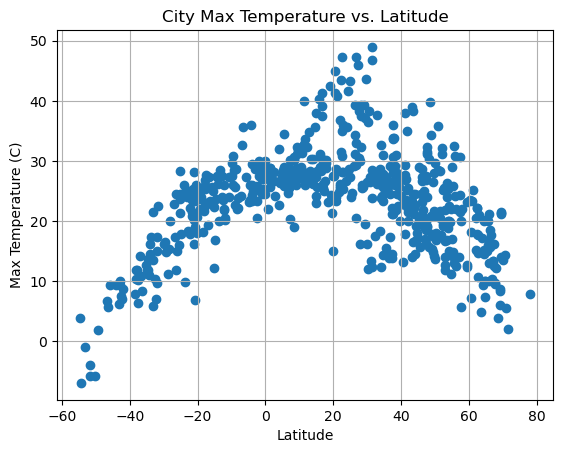

In [28]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Temperature vs. Latitude')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

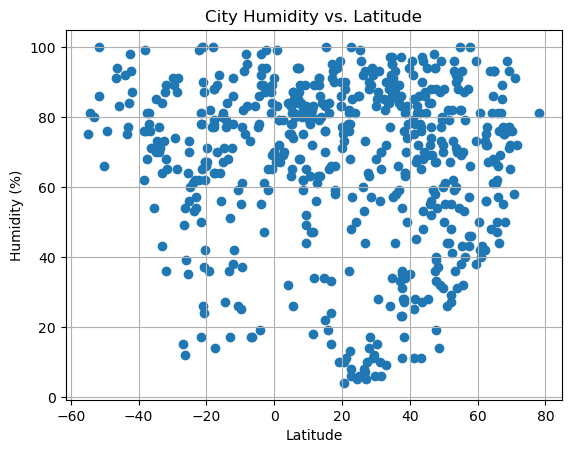

In [29]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Humidity vs. Latitude')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

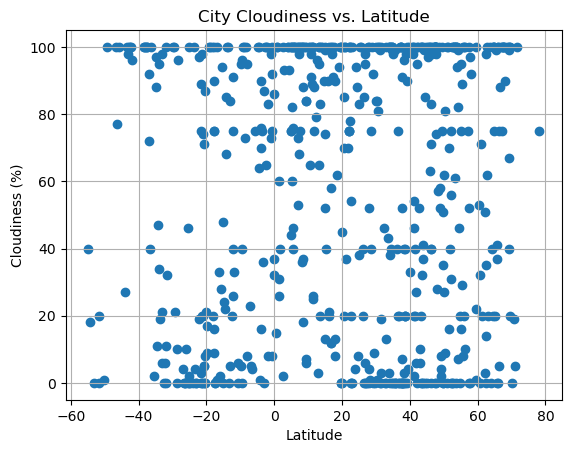

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Cloudiness vs. Latitude')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

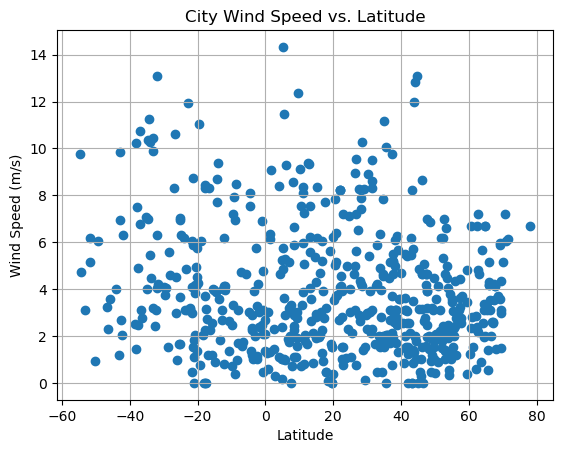

In [31]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Wind Speed vs. Latitude')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [66]:
def linreg(x, y):
    #initial scatter plot
    plt.scatter(x, y)
    
    #calculates regression line
    r_slope, r_int, r_r, r_p, r_std_err = linregress(x, y)
    r_fit = r_slope * x + r_int
    
    #prints the r value
    print(f'The r-value is: {r_r}')
    plt.plot(x, r_fit, color='red')
    
    #displays the regression equation, fixed placement needs work
    plt.text(0, 5, f'y={r_slope:.2f}*x+{r_int:.2f}')

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,prince rupert,54.3161,-130.3201,15.07,91,82,0.35,CA,1688821754
8,gallup,35.5281,-108.7426,15.42,44,0,2.06,US,1688821755
10,isafjordur,66.0755,-23.1240,10.02,81,0,5.14,IS,1688821755
11,ar ruways,24.1103,52.7306,35.66,50,94,4.98,AE,1688821756
12,ribeira grande,38.5167,-28.7000,22.22,64,20,3.09,PT,1688821756


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,14.08,81,92,10.73,SH,1688821752
1,grytviken,-54.2811,-36.5092,-6.97,81,18,4.71,GS,1688821753
2,dolores,-36.3132,-57.6792,8.41,71,100,2.76,AR,1688821691
4,port-aux-francais,-49.3500,70.2167,1.85,76,100,6.05,TF,1688821754
5,pangai,-19.8000,-174.3500,24.24,71,9,4.27,TO,1688821754


The r-value is: -0.5633019644899839


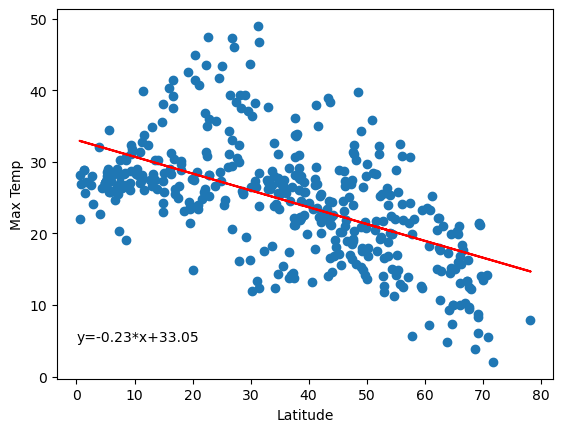

In [67]:
# Linear regression on Northern Hemisphere
linreg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.show()

The r-value is: 0.857386127340743


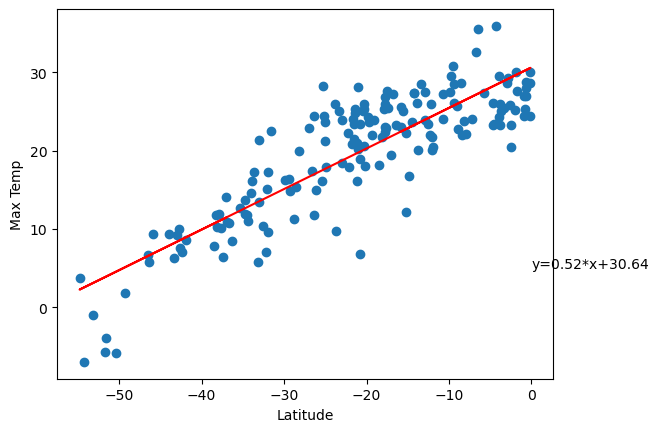

In [68]:
# Linear regression on Southern Hemisphere
linreg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.show()

In [69]:
print('We can see that max temp increases as we appraoch Lat=0 in both the north and south hemispherres.')

We can see that max temp increases as we appraoch Lat=0 in both the north and south hemispherres.


The r-value is: -0.027751856087354098


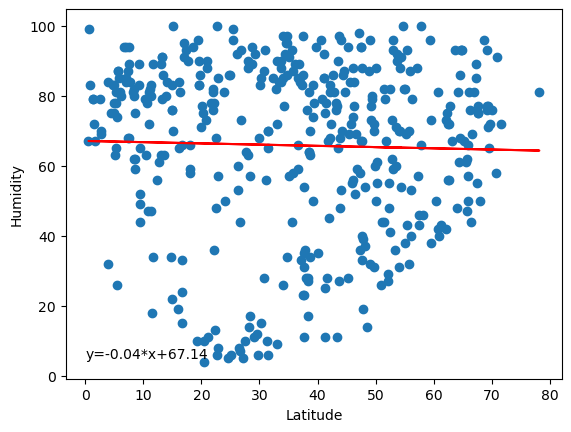

In [70]:
# Northern Hemisphere
linreg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()

The r-value is: -0.11274956677992218


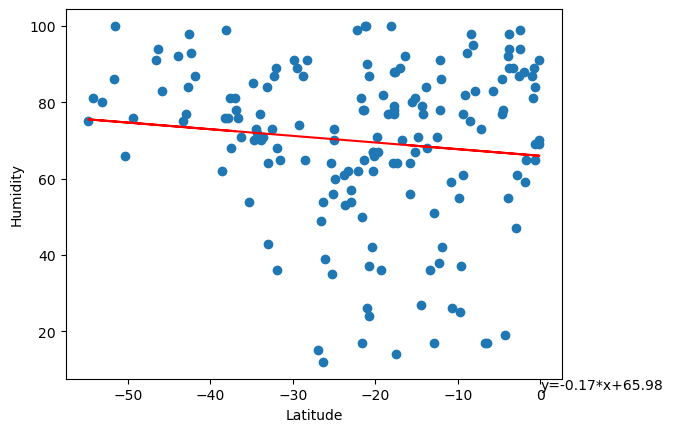

In [71]:
# Southern Hemisphere
linreg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()

In [72]:
print('The R values tell us there is very weak to no correlation ebwteen latitude and humidity.')

The R values tell us there is very weak to no correlation ebwteen latitude and humidity.


The r-value is: -0.10142841944895813


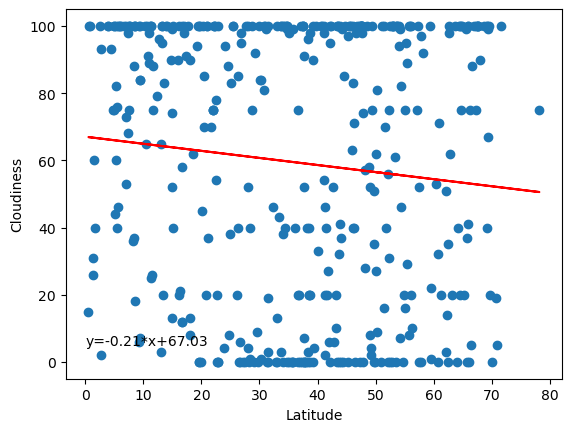

In [73]:
# Northern Hemisphere
linreg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.show()

The r-value is: 0.009036731735920338


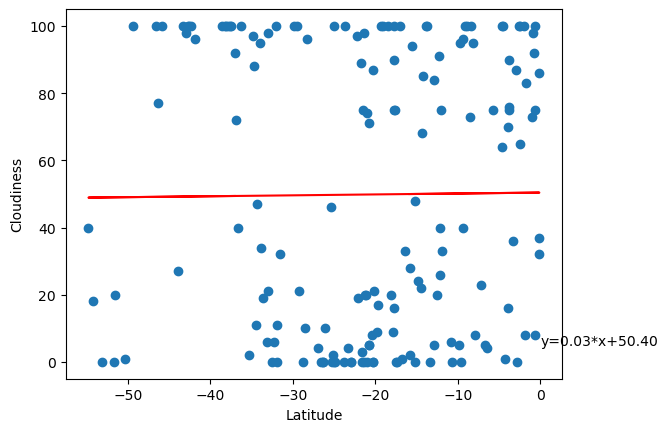

In [74]:
# Southern Hemisphere
linreg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.show()

In [75]:
print('The R value indicates there is very low to no correlation between latitiude and cloudiness.')

The R value indicates there is very low to no correlation between latitiude and cloudiness.


The r-value is: -0.10198364270450132


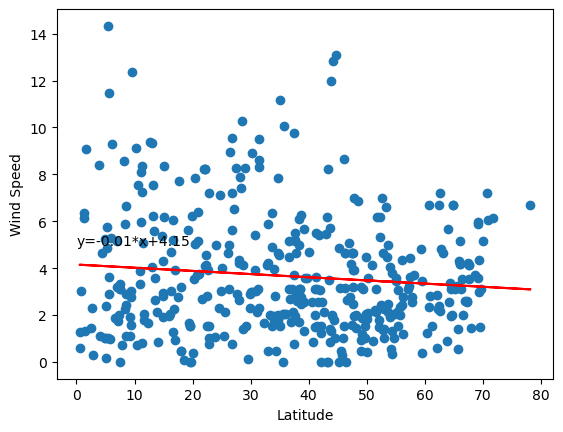

In [76]:
# Northern Hemisphere
linreg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.show()

The r-value is: -0.271035657902974


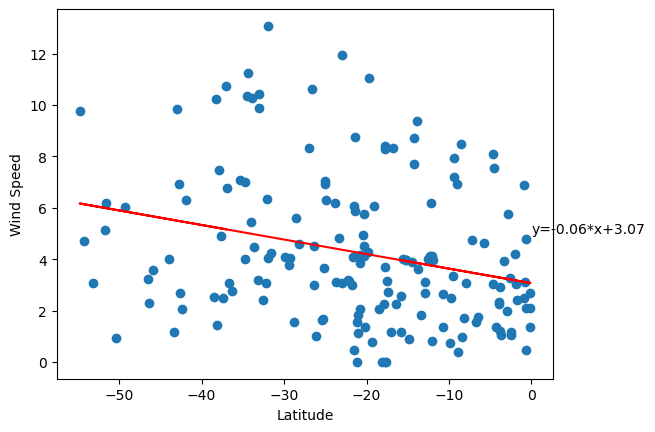

In [77]:
# Southern Hemisphere
linreg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.show()

In [78]:
print('The R value indicates there is a weak positive correlation bwtween latitude and wind speed as you approach the equator.')

The R value indicates there is a weak positive correlation bwtween latitude and wind speed as you approach the equator.
